# Load and explore the data

In [2]:
import pandas as pd

# Load data
df = pd.read_csv("loan_data.csv")

In [3]:
# Preview first rows
print("🔹 First 5 Rows:")
print(df.head())

🔹 First 5 Rows:
  loan_id  loan_amount  term  annual_income  credit_score  employment_length  \
0   L0001        25654    60          63765           584                 10   
1   L0002        17795    60          59816           645                  0   
2   L0003         2860    60          70106           637                  5   
3   L0004         7390    60          78932           627                  7   
4   L0005        23575    36          42100           581                  2   

              purpose  default  
0             medical        1  
1  debt_consolidation        0  
2                 car        0  
3    home_improvement        0  
4  debt_consolidation        1  


In [4]:
# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Missing Values:
loan_id              0
loan_amount          0
term                 0
annual_income        0
credit_score         0
employment_length    0
purpose              0
default              0
dtype: int64


In [5]:
# Data types
print("\n🔹 Data Types:")
print(df.dtypes)


🔹 Data Types:
loan_id              object
loan_amount           int64
term                  int64
annual_income         int64
credit_score          int64
employment_length     int64
purpose              object
default               int64
dtype: object


In [6]:
# Summary statistics
print("\n🔹 Summary Stats:")
print(df.describe())


🔹 Summary Stats:
       loan_amount         term  annual_income  credit_score  \
count   4000.00000  4000.000000    4000.000000   4000.000000   
mean   24374.94625    47.964000   99891.370250    678.314750   
std    13859.30002    12.001446   42473.952322     98.880539   
min     1038.00000    36.000000   25055.000000    500.000000   
25%    12791.50000    36.000000   64038.250000    594.000000   
50%    23576.00000    36.000000   98392.000000    678.000000   
75%    35844.75000    60.000000  135623.500000    764.000000   
max    49982.00000    60.000000  179938.000000    850.000000   

       employment_length      default  
count         4000.00000  4000.000000  
mean             5.01450     0.482500  
std              3.18321     0.499756  
min              0.00000     0.000000  
25%              2.00000     0.000000  
50%              5.00000     0.000000  
75%              8.00000     1.000000  
max             10.00000     1.000000  


# Exploratory Data Analysis (EDA)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="whitegrid")

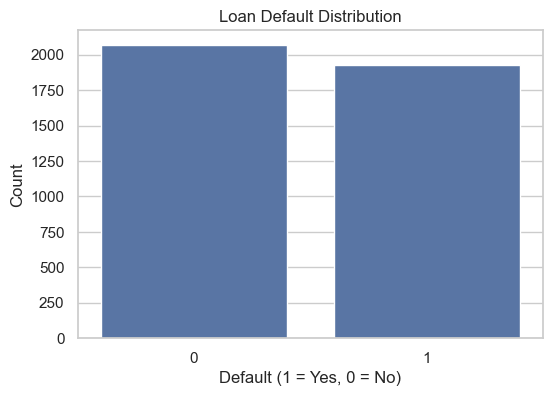

In [8]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df)
plt.title("Loan Default Distribution")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

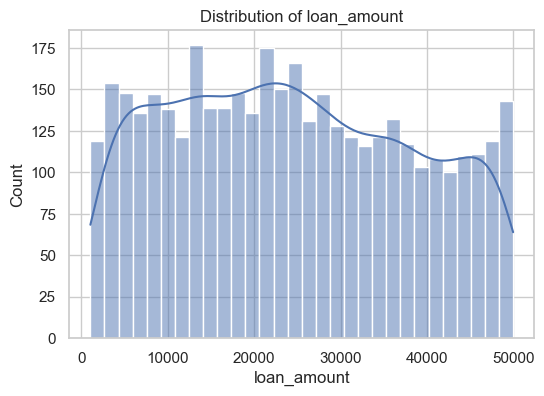

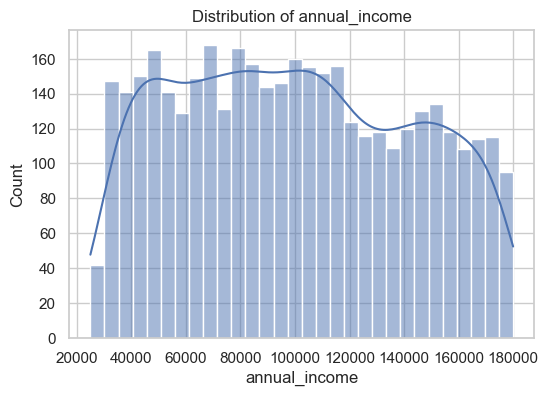

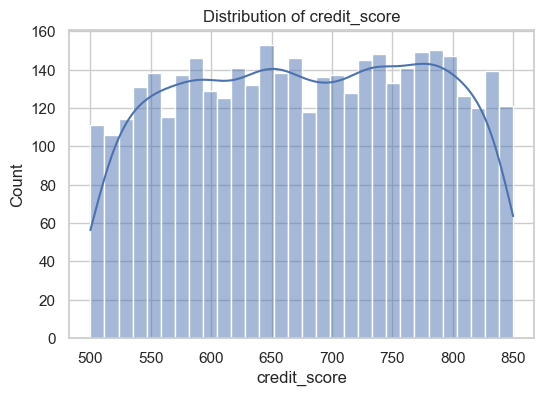

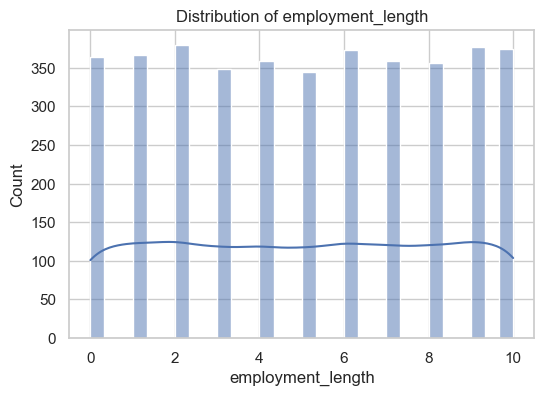

In [9]:
# Numeric feature distributions
num_cols = ['loan_amount', 'annual_income', 'credit_score', 'employment_length']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

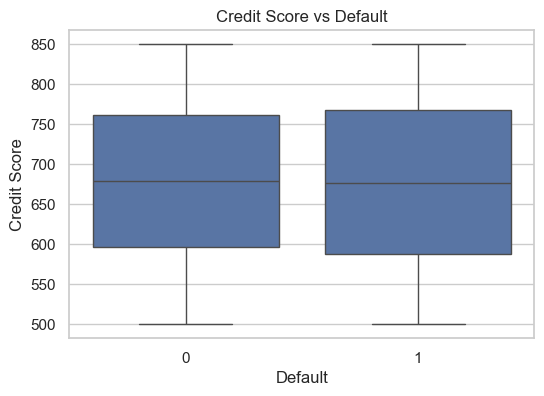

In [10]:
# Box plot: Credit score vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='default', y='credit_score', data=df)
plt.title("Credit Score vs Default")
plt.xlabel("Default")
plt.ylabel("Credit Score")
plt.show()

# Feature Engineering & Encoding

In [12]:
from sklearn.model_selection import train_test_split

# One-hot encode the 'purpose' column
df_encoded = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [13]:
# Features and target
X = df_encoded.drop(['loan_id', 'default'], axis=1)
y = df_encoded['default']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 3200
Testing samples: 800


# Model Training & Evaluation

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Results
Accuracy: 0.5
Confusion Matrix:
 [[250 177]
 [223 150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.59      0.56       427
           1       0.46      0.40      0.43       373

    accuracy                           0.50       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.50      0.50      0.50       800



In [16]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("🔹 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

🔹 XGBoost Results
Accuracy: 0.5075
Confusion Matrix:
 [[222 205]
 [189 184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53       427
           1       0.47      0.49      0.48       373

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:02:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
